# Practical session: first steps with PyCuda


**Single Instruction Multiple Data (SIMD)**


**Single Instruction Multiple Thread (SIMT)**


**Threads Hierarchy**

Threads the execution of a kernel on a single piece of data. each thread gets mapped to one cuda core, w. Sets of threads are grouped into blocks.
Blocks are grouped into Grids. Each kernel launch creates a single Grid.

In this assignment, you will learn about CUDA through the PyCUDA language. PyCUDA is a Python interface to the CUDA language, and more specifically a wrapper around C functions.

Online documentation is available at this address: : https://documen.tician.de/pycuda/

Before you start, you need to enable GPU support in Colab. To do this go to :

---


 - Edit->Notebook Settings

and activate the GPU (Hardware acceleration). 

The following cell allows you to install PyCuda in your Collab work environment

In [10]:
%%capture
!pip install pycuda

Here is a simple example (a kernel that multiplies term by term the elements of a table), from the PyCUDA documentation. Before starting, test its execution and check the output of the program.

In [11]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy

from pycuda.compiler import SourceModule

mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

multiply_them = mod.get_function("multiply_them")

a = numpy.random.randn(400).astype(numpy.float32)
b = numpy.random.randn(400).astype(numpy.float32)

dest = numpy.zeros_like(a)
multiply_them(
        drv.Out(dest), drv.In(a), drv.In(b),
        block=(400,1,1), grid=(1,1))

print(dest-a*b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Try to design the same code with `GPUarray`


In [12]:
# Repeat the code above with GPUArray
import pycuda.gpuarray as gpuarray # initialization
a = numpy.random.randn(400).astype(numpy.float32)
b = numpy.random.randn(400).astype(numpy.float32)
a_gpu = gpuarray.to_gpu(a)
b_gpu = gpuarray.to_gpu(b)
dest = (a_gpu*b_gpu).get()

# CROSS CHECK THE OUTPUT
print(dest - a*b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


# First part
In the first part of this session, we will see how to define a very simple kernel, allowing to invert the contents of a table.



In [13]:
# starting by inverting the content of a table on CUDA
N = 100000
my_tab = numpy.arange(N).astype(numpy.float32)
my_tab # sample large array
number_of_blocks= numpy.ceil(N/32).astype(numpy.int32)

First code your kernel function


In [14]:
# initialize kernel for reversing table contents
kernel = """
__global__ void invert_tab(float *dest,float *tab, int N)
{
  const int i = blockIdx.x*blockDim.x + threadIdx.x;
  dest[i] = tab[N - i - 1];
}
"""
mod = SourceModule(kernel)

Then test it:

In [15]:
# cross-check the kernel outcome

invert_tab = mod.get_function("invert_tab")
a = numpy.random.randn(N).astype(numpy.float32)
dest = numpy.zeros_like(a)

invert_tab(
    drv.Out(dest), drv.In(my_tab), numpy.int32(N),
    block=(32, 1, 1), grid=(int(number_of_blocks), 1, 1)
    )
assert(((dest-my_tab[::-1])==0).all())

In [16]:
print(dest-my_tab[::-1])

[0. 0. 0. ... 0. 0. 0.]


# Second part
On the same basis, now write a kernel that takes a matrix of data of size NxN, and calculates a vector of size N which is the sum of each line of the matrix. 

You will take a grid of size (4,4,1)

Test.

In [17]:
# kernel parameters
N = 100000
my_tab = numpy.arange(N).astype(numpy.float32)
my_tab # sample large array
number_of_blocks= numpy.ceil(N/32).astype(numpy.int32)

In [18]:
# define matrix
M = 16
matrix = numpy.ones((M, M))
a = matrix.flatten().astype("int32")
dest = numpy.zeros(M).astype("int32")
col = matrix.shape[1]

In [19]:
# kernel definition for multiplication summation

kernel = """
 __global__ void row_summation(float *dest, float *matrix) 
 {
   const int idx = threadIdx.x;

   // initiate summation
   float sum = 0;

  // extract the total matrix summation through a loop
  for (int i=0; i<%(M)s; i++){
    sum = sum + matrix[idx*%(M)s + i];
    }
  dest[idx] = sum;
 
 }
 """
kernel_code = kernel % {"M": M}
mod = SourceModule(kernel_code)
matrix_sum = mod.get_function("row_summation")

In [20]:
matrix_sum(
    drv.Out(dest), drv.In(a),
    block=(4, 4, 1), grid=(1, 1)
    )
dest

array([        16,         16,         16,         16, 1203981696,
       1203981568, 1203981440, 1203981312, 1203981184, 1203981056,
       1203980928, 1203980800, 1203980672, 1203980544, 1203980416,
       1203980288], dtype=int32)

# Third part
Try to implement a kernel that computes the product of two square matrices, as seen in the course. Compare its execution time with the same  product written in numpy. For what size of the matrix do you get acceleration ?


In [21]:
import numpy as np

In [22]:
# define two square matrices
MATRIX_SIZE = 100
a = np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.float32)
b = np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.float32)

In [23]:
def matrix_multiplication(a, b):
  MATRIX_SIZE = b.shape[0]
  kernel = """
  __global__ void MatrixMulKernel(float *a, float *b, float *c)
  {
    int threadx = threadIdx.x+blockIdx.x*blockDim.x;
    int thready = threadIdx.y+blockIdx.y*blockDim.y;

    //store elements of the matrix that is computed by the thread
    float Pvalue = 0;
    
    // Each thread loads one row of M and one column of N
    //   to produce one element of P.
    for (int k = 0; k < %(MATRIX_SIZE)s; ++k) {
      float Aelement = a[thready * %(MATRIX_SIZE)s + k];
      float Belement = b[k * %(MATRIX_SIZE)s + threadx];
      Pvalue += Aelement * Belement;
      }
      
    // Write the matrix to device memory;
    // each thread writes one element
    c[thready * %(MATRIX_SIZE)s + threadx] = Pvalue;
    }
    """
  num_of_blocks = np.ceil(MATRIX_SIZE/1024).astype(np.int32)
  if MATRIX_SIZE > 32:
    MATRIX_SIZE = 32
  kernel_update= kernel % {
      'MATRIX_SIZE': MATRIX_SIZE
      }
      
  # compile the kernel code
  mod = SourceModule(kernel_update)

  # get the kernel function from the compiled module
  matrixmul = mod.get_function("MatrixMulKernel")
    
  dest = a.copy()
  
  # bdim = (MATRIX_SIZE, MATRIX_SIZE, 1)
  # dx, mx = divmod(MATRIX_SIZE, bdim[0])
  # dy, my = divmod(MATRIX_SIZE, bdim[1])
  # gdim = ( (dx + (mx>0)), (dy + (my>0)) )

  matrixmul(
      drv.In(a), drv.In(b), drv.Out(dest),
      block = (MATRIX_SIZE, MATRIX_SIZE, 1),
      grid = (int(num_of_blocks), 1, 1),
      )
  #Reference: https://stackoverflow.com/questions/14504580/pycuda-blocks-and-grids-to-work-with-big-datas
  return dest

In [24]:
MATRIX_SIZE

100

In [51]:
# confirm that it works

# first define the local numpy multiplication
def matrixMult(a, b):
  return np.outer(a, b)

local_mult = matrixMult(a, b)
cuda_mult = matrix_multiplication(a, b)
cuda_mult

array([[-6.6728764e+00,  1.9187626e+01, -2.7117810e+00, ...,
         8.5565186e+00, -1.3567724e+00, -6.0225234e+00],
       [-2.6252570e+00, -6.9130974e+00, -3.4416659e+00, ...,
         1.1565751e+00, -2.6006320e+00, -1.6517913e+00],
       [ 1.6602484e+00,  4.1496029e+00,  1.3959944e-01, ...,
         1.0212859e+01,  4.3135662e+00, -7.0011420e+00],
       ...,
       [ 1.9385476e-38,  1.7787068e-38,  1.6921521e-38, ...,
         9.1731912e-39,  1.5265986e-38,  2.2828797e-38],
       [ 3.4771652e-38,  1.6468233e-38,  7.6591541e-39, ...,
         1.3900442e-38,  1.3479638e-38,  1.3150218e-38],
       [ 1.3645860e-38,  1.3699772e-38,  1.3365862e-38, ...,
         3.4984809e-38,  1.8597089e-38,  1.7861825e-38]], dtype=float32)

In [52]:
# check for runtime performance for different matrix sizes
import time
def timer(function):
  start=time.process_time()
  eval(function)
  end=time.process_time()
  return (end-start)

In [53]:
#display time evolution
sizes = np.arange(10, 100, 10) # matrix sizes

import matplotlib.pyplot as plt

local_runtime = []
cuda_runtime = []

for n in sizes:
  a = np.random.randn(n, n).astype(np.float32)
  b = np.random.randn(n, n).astype(np.float32)
  local_runtime.append(timer("matrixMult(a,b)"))
  cuda_runtime.append(timer("matrix_multiplication(a, b)" ))

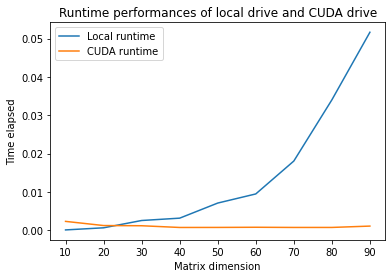

In [54]:
%matplotlib inline
plt.plot(sizes, local_runtime, label="Local runtime")
plt.plot(sizes, cuda_runtime, label="CUDA runtime")
plt.title("Runtime performances of local drive and CUDA drive")
plt.xlabel("Matrix dimension")
plt.ylabel("Time elapsed")
plt.legend()

**QUESTION:** For what size of the matrix do you get acceleration?

**Answer:**
The multiplication accelerated on the CUDA drive after reaching a matrix dimension of size **25 by 25**. This shows that before reaching this dimension of matrices, the cost of sending the matrices to the driver takes more time than performing the multiplication locally. For such cases, it is recommended to use a local runtime for such multiplication. However, after reaching the threshold of matrix dimension of size **25 by 25**, using the CUDA runtime environment is highly recommended to speed up the runtime performances as seen the graphical display above showing the relative performances of both runtime environment when provided with an increasing dimension of matrices.


# Last part (Optional)
Take the hyperspectral image from the refresher course. Try to design a kernel which transforms it into a greyscale image (by averaging all the spectral components per pixel). Again, compare its performance with a simple naive numpy implementation.


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# read and display hyperspectral image
from scipy.io import loadmat
file_path = '/content/drive/MyDrive/UBS/General Info/Urban_R162.mat'
dataset = loadmat(file_path)

In [31]:
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'SlectBands', 'nRow', 'nCol', 'nBand', 'Y', 'maxValue'])

In [32]:
dataset["Y"]

array([[109, 116, 119, ...,  16,  12,   9],
       [113, 119, 119, ...,  19,  16,  13],
       [118, 130, 127, ...,  28,  25,  23],
       ...,
       [259, 266, 289, ...,  77,  62,  47],
       [237, 256, 275, ...,  76,  66,  57],
       [264, 307, 275, ...,  61,  50,  72]], dtype=uint16)

In [33]:
img = dataset['Y'].astype("double")
#dataset["168"]

In [34]:
import matplotlib.pyplot as plt
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'RGB composites extracted from an hyperspectral image')

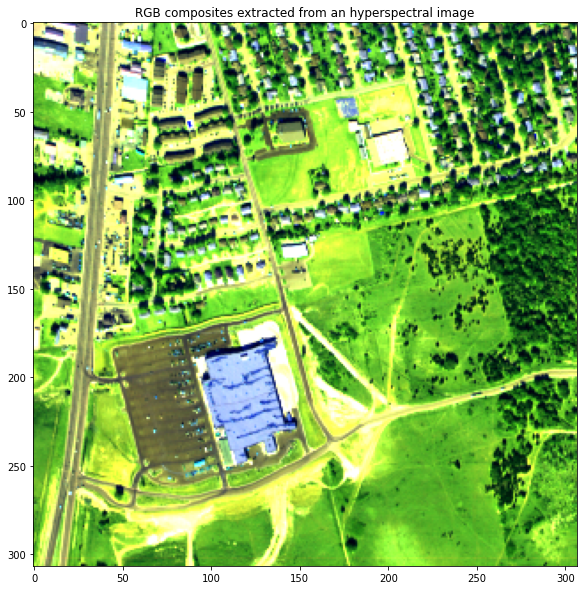

In [56]:
# display an RGB stack of the hyperspectral image
RGB = [dataset["Y"][150].reshape(307, 307), dataset["Y"][100].reshape(307, 307), dataset["Y"][10].reshape(307, 307)]
RGB = np.stack(RGB, axis = -1)

plt.figure(figsize=(10, 10))
plt.imshow(RGB)
plt.title("RGB composites extracted from an hyperspectral image")

In [71]:
# kernel that transforms hyperspectral image int greyscale image

def RGB2Gray(img):
  kernel = """
  #define INDEX(a, b) a*256+b
  __global__ void rgb2gray(float *dest,float *r_img, float *g_img, float *b_img)
  {
    unsigned int idx = threadIdx.x+(blockIdx.x*(blockDim.x*blockDim.y));
    unsigned int a = idx/256;
    unsigned int b = idx%256;
    
    dest[INDEX(a, b)] = (0.299*r_img[INDEX(a, b)]+0.587*g_img[INDEX(a, b)]+0.114*b_img[INDEX(a, b)]);
    }
    """
  mod = SourceModule(kernel)
  
  #print(a)
  r_img = RGB[:, :, 0].reshape(94249, order='F')
  g_img = RGB[:, :, 1].reshape(94249, order='F')
  b_img = RGB[:, :, 2].reshape(94249, order='F')
  dest=r_img
  
  rgb2gray = mod.get_function("rgb2gray")
  rgb2gray(drv.Out(dest), drv.In(r_img), drv.In(g_img),drv.In(b_img),block=(1024, 1, 1), grid=(64, 1, 1))
   
  dest=np.reshape(dest,(307,307), order='F')

  return dest

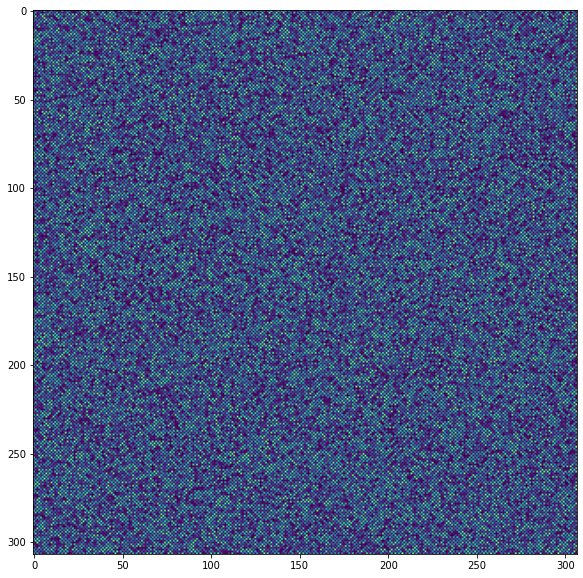

In [70]:
# display the gray image created with PyCUDA
plt.figure(figsize=(10, 10))
plt.imshow(RGB2Gray(RGB) )